<ipython-input-6-e6f17ab67cde>:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  completed_trips['distance'].fillna(completed_trips['distance'].median(), inplace=True)


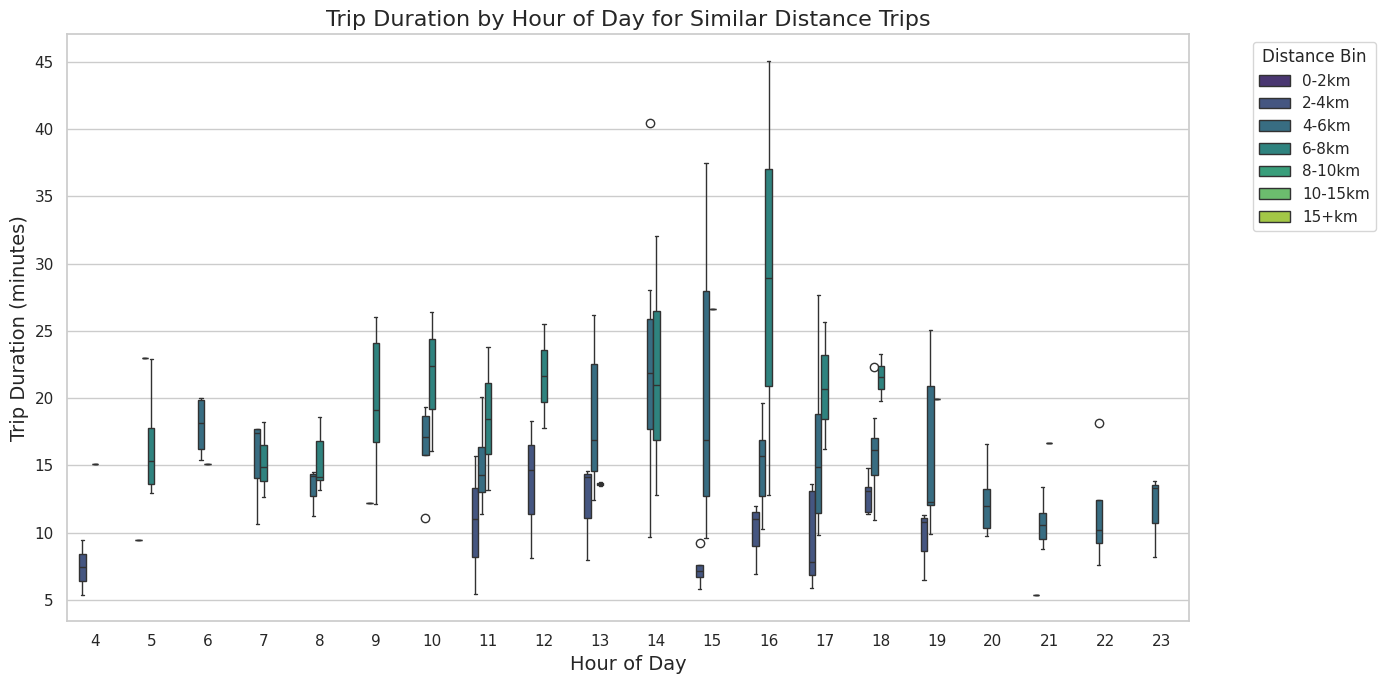

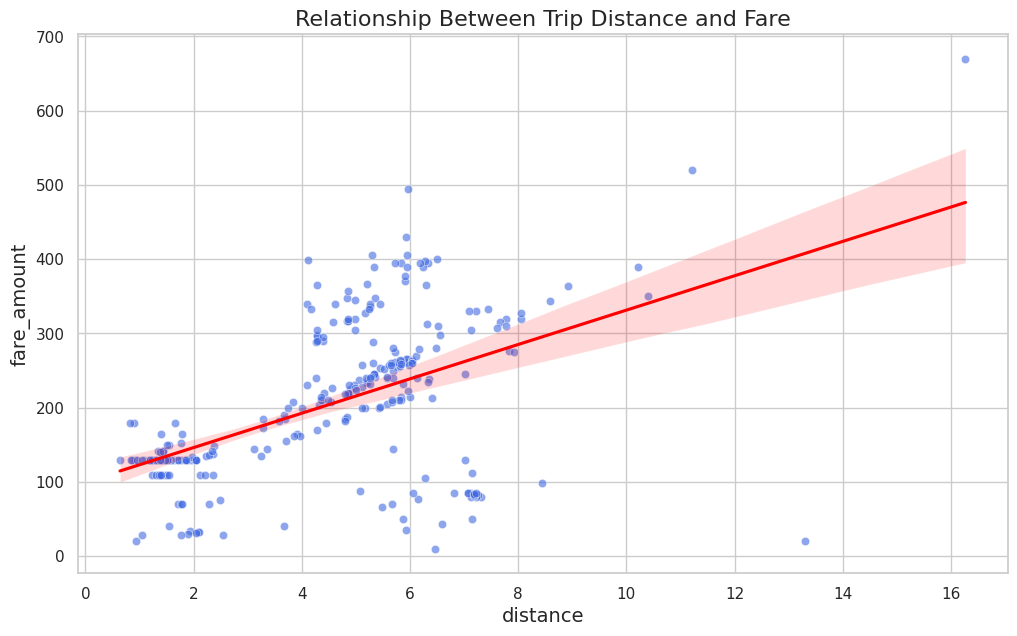


Correlation between distance and fare: 0.54

Average fare per km: 57.66 TRY/km


<ipython-input-6-e6f17ab67cde>:101: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='request_hour', y='fare_per_km', data=completed_trips, palette="coolwarm", ci=None)
<ipython-input-6-e6f17ab67cde>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='request_hour', y='fare_per_km', data=completed_trips, palette="coolwarm", ci=None)


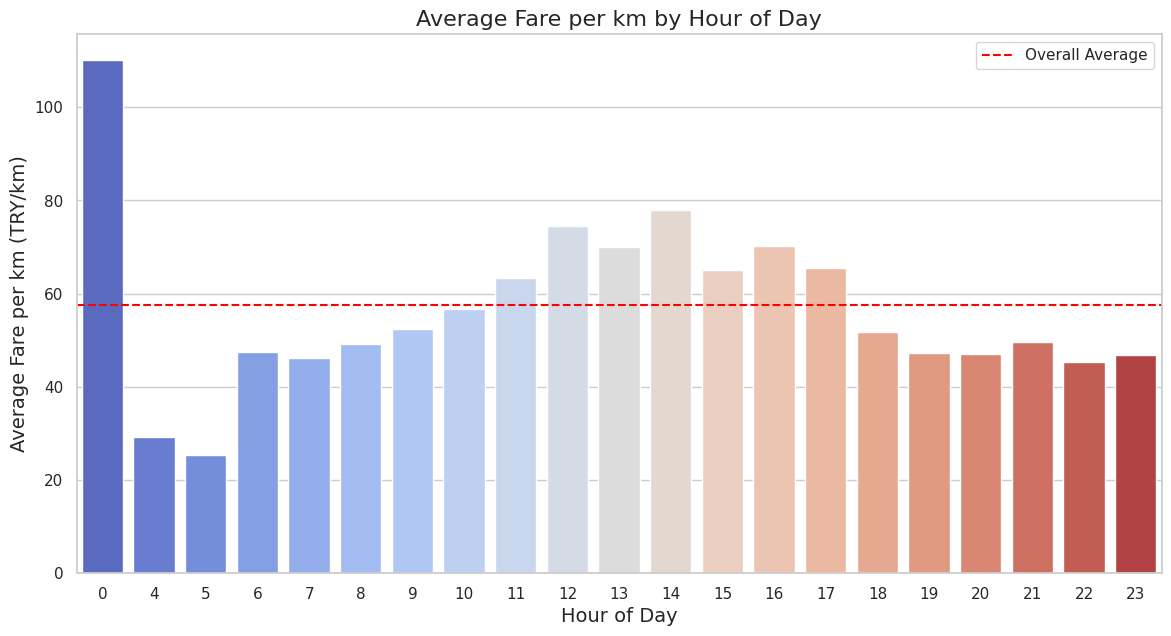

<ipython-input-6-e6f17ab67cde>:112: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='request_day_name', y='fare_per_km', data=completed_trips,
<ipython-input-6-e6f17ab67cde>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='request_day_name', y='fare_per_km', data=completed_trips,


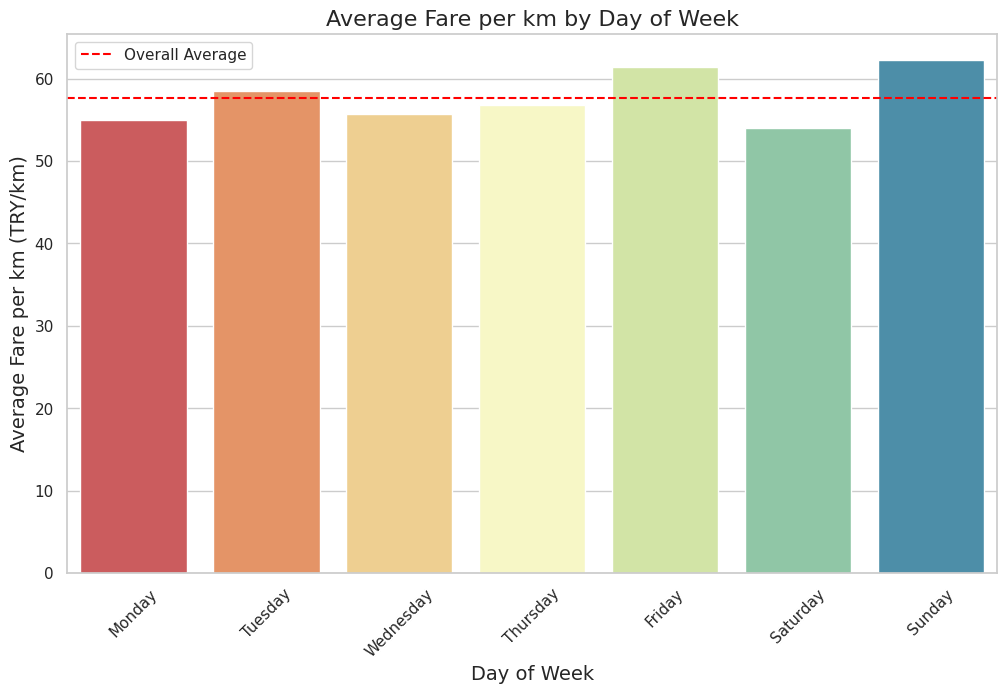

<ipython-input-6-e6f17ab67cde>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='request_hour', data=completed_trips, palette="Blues_r")


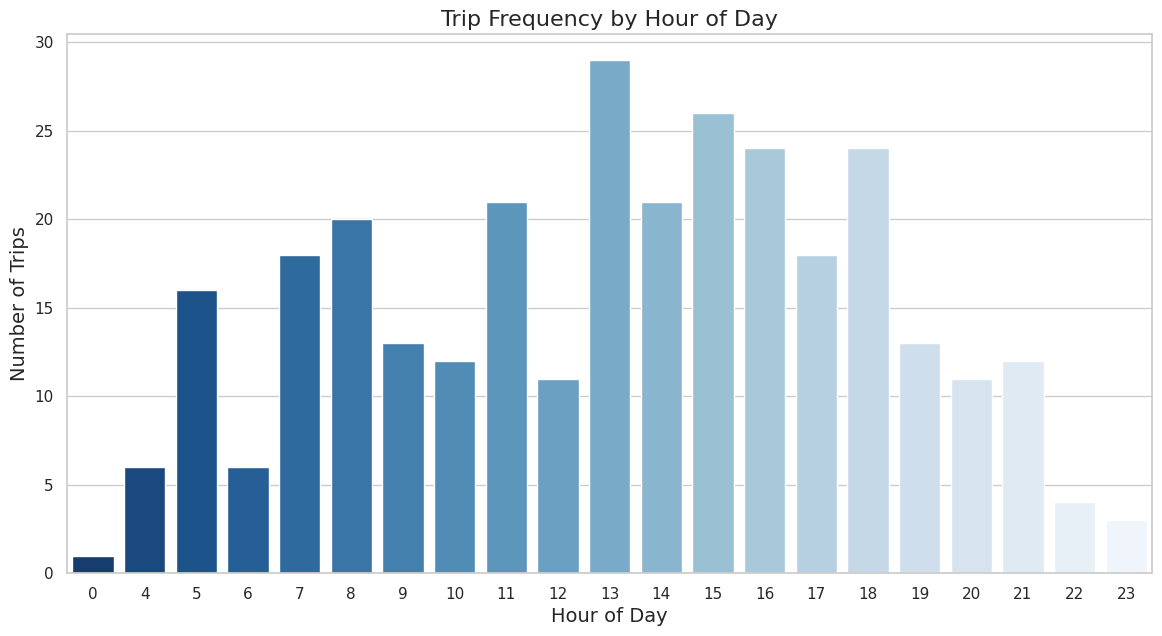

<ipython-input-6-e6f17ab67cde>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='request_day_name', data=completed_trips, order=day_order, palette="Greens_r")


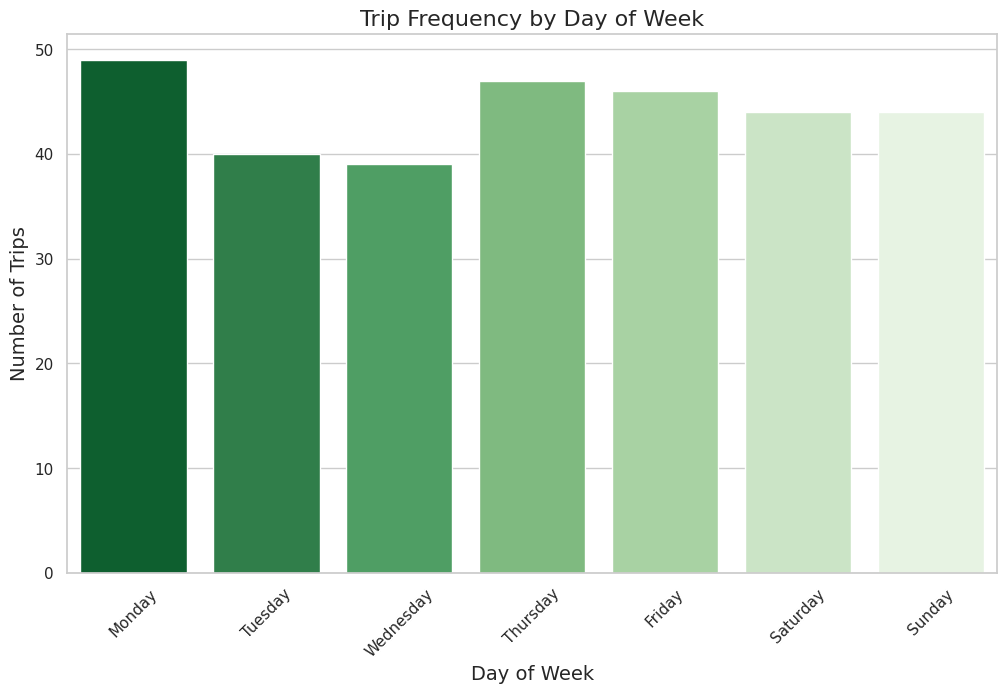

<ipython-input-6-e6f17ab67cde>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='request_hour', y='response_time',


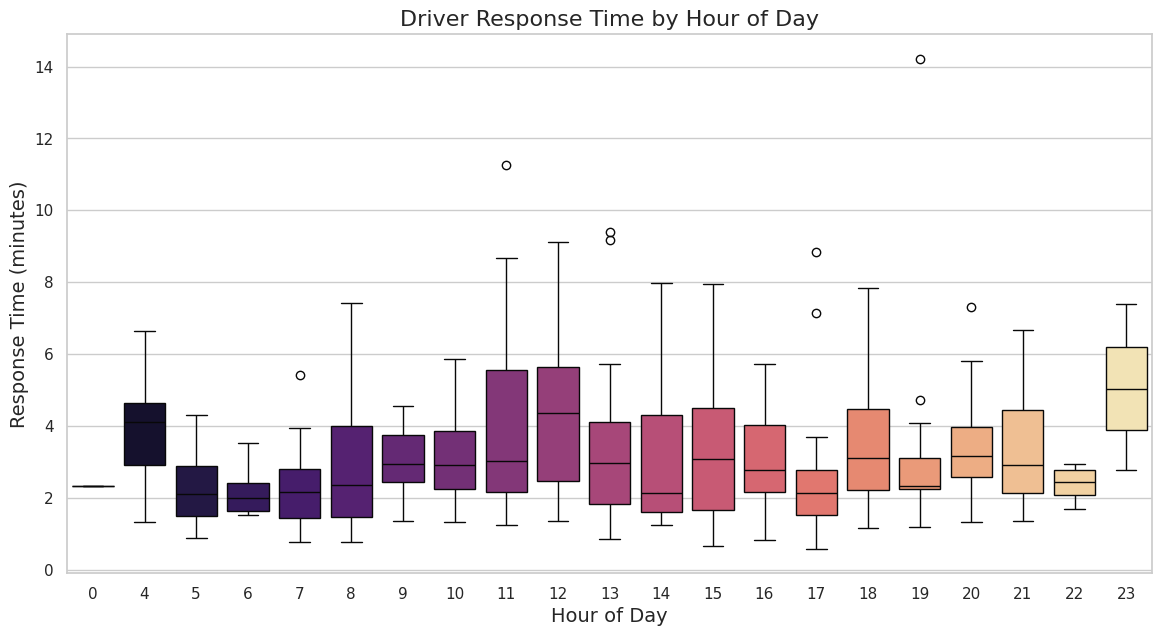


STATISTICAL HYPOTHESIS TESTING RESULTS:

1. Fare Difference Between Peak and Off-Peak Hours:
Peak hours fare/km mean: 53.82 TRY
Off-peak hours fare/km mean: 59.50 TRY
T-statistic: -1.57, P-value: 0.1169
Conclusion: Fail to reject null hypothesis - no significant difference.

2. Duration Difference Between Weekends and Weekdays:
Weekend duration mean: 12.53 minutes
Weekday duration mean: 13.47 minutes
T-statistic: -1.04, P-value: 0.2980
Conclusion: Fail to reject null hypothesis - no significant difference.

3. Distance Difference Between Weekends and Weekdays:
Weekend distance mean: 4.22 km
Weekday distance mean: 4.34 km
T-statistic: -0.40, P-value: 0.6931
Conclusion: Fail to reject null hypothesis - no significant difference.


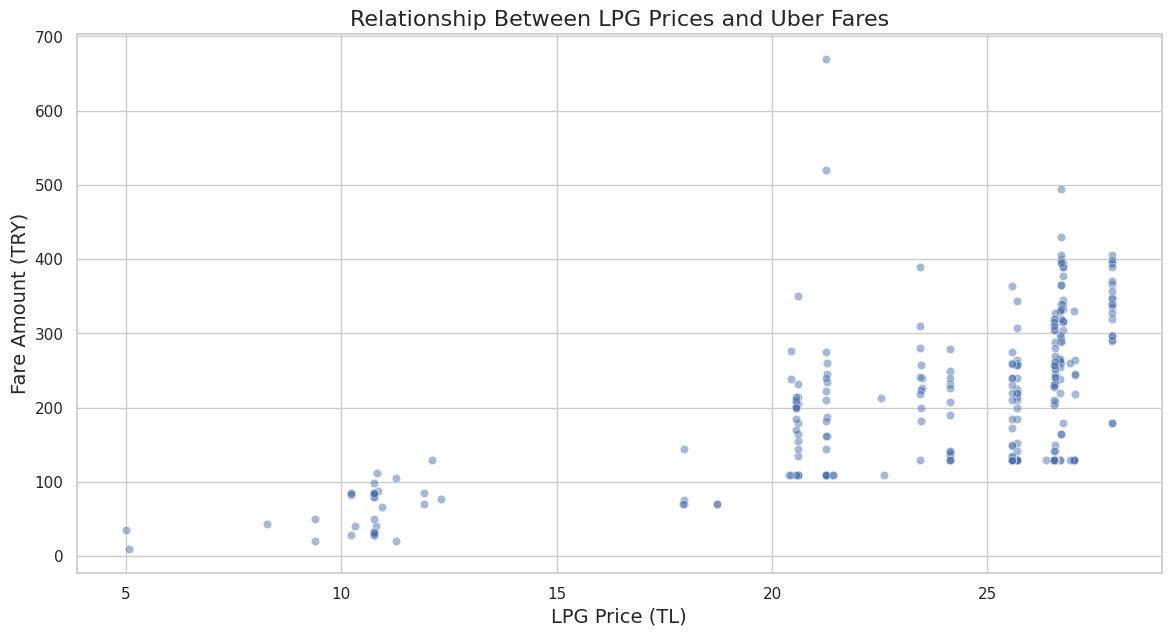


Correlation between LPG prices and fare amounts: 0.593


<ipython-input-6-e6f17ab67cde>:239: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='request_date', y='profit_margin', data=daily_metrics, ci=None)


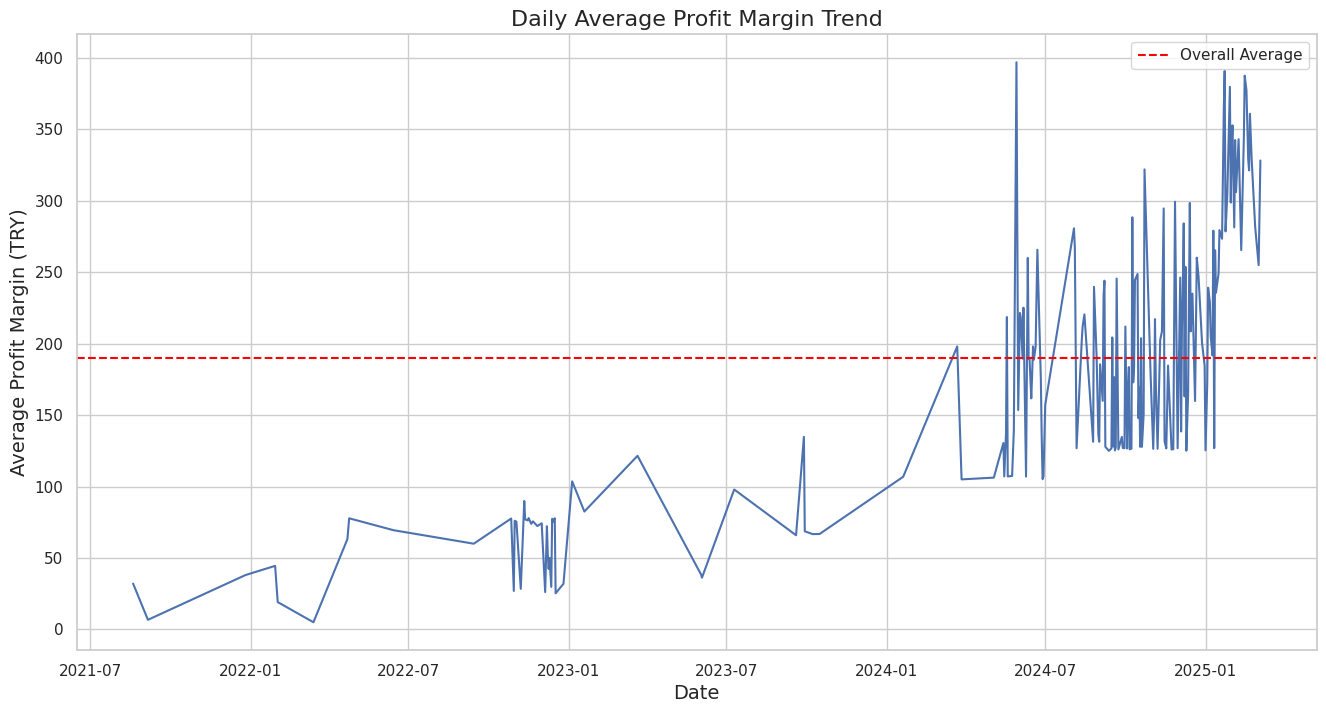


MACHINE LEARNING MODELS

Enhanced Fare Prediction Model (with LPG prices):
R² Score: 0.841
RMSE: 39.46 TRY

Feature Coefficients:
distance: 71.016
request_hour: -4.364
is_peak: -4.172
is_weekend: -2.109
Otogaz: 77.153

Profit Margin Prediction Model (Random Forest):
R² Score: 0.844
RMSE: 37.23 TRY

Feature Importances:
distance: 0.465
request_hour: 0.026
is_peak: 0.003
is_weekend: 0.002
Otogaz: 0.504


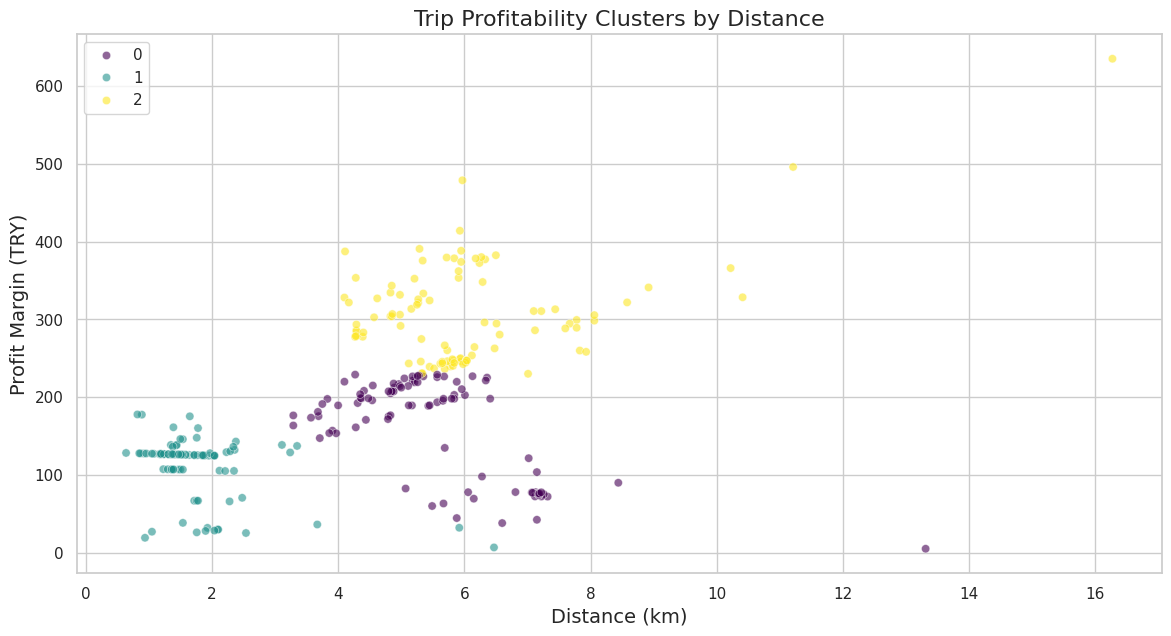


Cluster Characteristics:
         distance  fare_amount  fuel_cost  profit_margin
cluster                                                 
0        5.549691   172.014948  10.335000     161.679948
1        1.702301   116.891239   3.680723     113.210516
2        6.058081   321.057576  15.712748     305.344828

Break-even Analysis:
Average cost per km: 2.30 TRY/km
Average fare per km: 57.66 TRY/km
Gross margin per km: 55.36 TRY/km


<ipython-input-6-e6f17ab67cde>:343: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_groups = completed_trips.groupby(price_bins).agg({


<Figure size 1400x700 with 0 Axes>

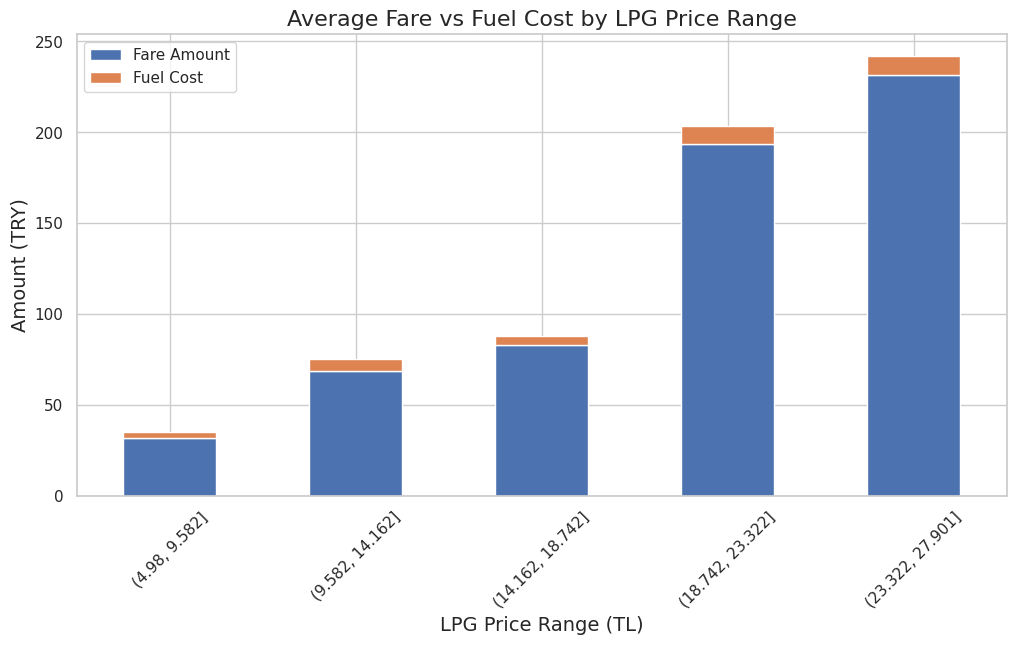


=== KEY INSIGHTS ===
1. LPG prices show a correlation of 0.59 with Uber fares
2. The average profit margin is 189.98 TRY per trip
3. During peak LPG prices (> 25.68 TL), profit margins decrease by 28.5%
4. The break-even point requires minimum fares of 2.30 TRY/km

3. OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     41.39
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.82e-22
Time:                        22:44:25   Log-Likelihood:                -1818.2
No. Observations:                 309   AIC:                             3644.
Df Residuals:                     305   BIC:                             3659.
Df Model:                           3                                     

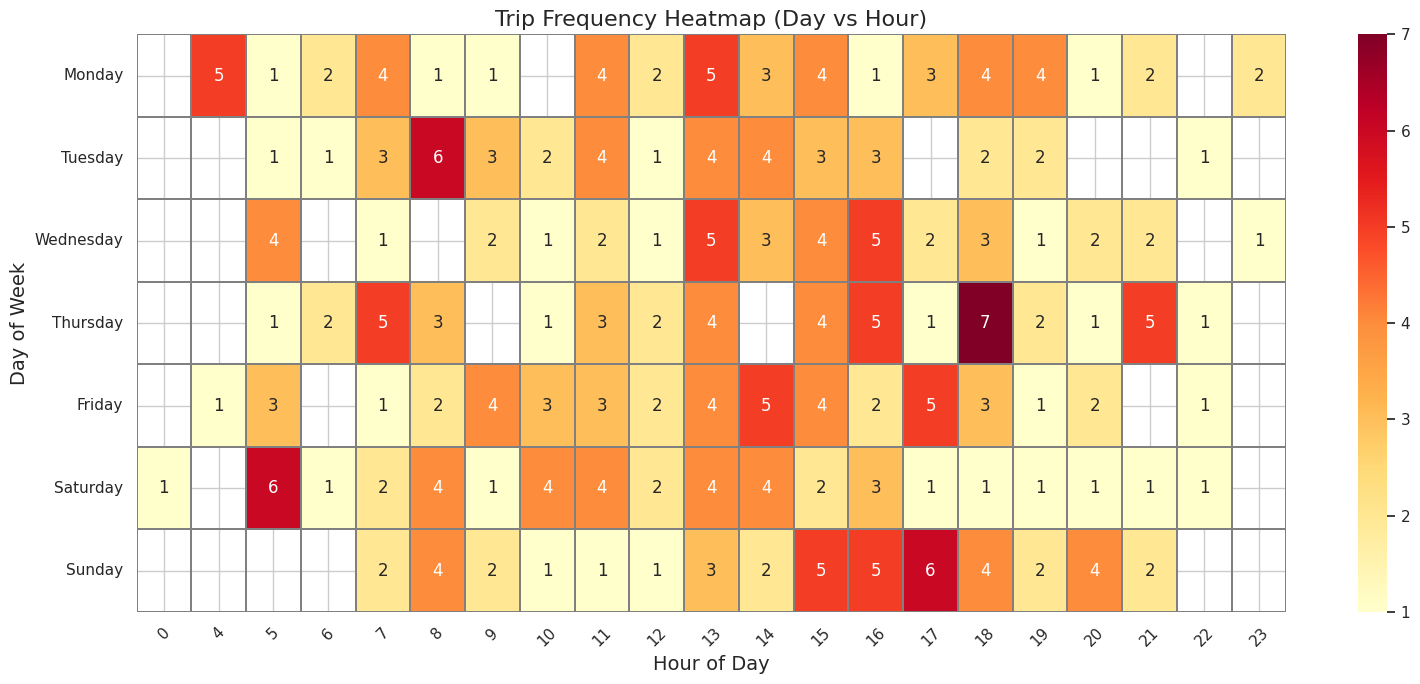

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import pytz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Set style for better visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
trips_df = pd.read_csv('trips_data-0.csv')
lpg_prices = pd.read_csv('merged_gas_prices.csv')

### DATA PREPROCESSING ###

# Convert string datetime columns to datetime objects
datetime_cols = ['request_time', 'begin_trip_time', 'dropoff_time']
for col in datetime_cols:
    if col in trips_df.columns:
        trips_df[col] = pd.to_datetime(trips_df[col])

# Convert LPG date column
lpg_prices['Tarih'] = pd.to_datetime(lpg_prices['Tarih'])

# Calculate trip metrics
trips_df['trip_duration'] = (trips_df['dropoff_time'] - trips_df['begin_trip_time']).dt.total_seconds() / 60
trips_df['response_time'] = (trips_df['begin_trip_time'] - trips_df['request_time']).dt.total_seconds() / 60

# Extract temporal features
trips_df['request_hour'] = trips_df['request_time'].dt.hour
trips_df['request_day_of_week'] = trips_df['request_time'].dt.dayofweek
trips_df['request_day_name'] = trips_df['request_time'].dt.day_name()
trips_df['request_date'] = trips_df['request_time'].dt.date

# Merge LPG prices with trip data
lpg_prices['date'] = lpg_prices['Tarih'].dt.date
merged_data = pd.merge(trips_df, lpg_prices, left_on='request_date', right_on='date', how='left')

# Clean and filter data
completed_trips = merged_data[merged_data['status'] == 'completed'].copy()
completed_trips['distance'].fillna(completed_trips['distance'].median(), inplace=True)

completed_trips = completed_trips[completed_trips['distance'] > 0]

# Bin distances into categories
completed_trips['distance_bin'] = pd.cut(completed_trips['distance'],
                                       bins=[0, 2, 4, 6, 8, 10, 15, 20],
                                       labels=['0-2km', '2-4km', '4-6km', '6-8km', '8-10km', '10-15km', '15+km'])

### EXPLORATORY ANALYSIS ###

# 1. Trip Duration Analysis
# This boxplot helps reveal how trip durations vary across different hours,
# especially for trips in similar distance ranges.
plt.figure(figsize=(14, 7))
sns.boxplot(x='request_hour', y='trip_duration', hue='distance_bin',
            data=completed_trips[completed_trips['distance_bin'].isin(['2-4km', '4-6km', '6-8km'])],
            palette="viridis")
plt.title('Trip Duration by Hour of Day for Similar Distance Trips', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Trip Duration (minutes)', fontsize=14)
plt.legend(title='Distance Bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Distance vs Fare Analysis
# This shows the relationship between trip distance and fare amount.
plt.figure(figsize=(12, 7))
sns.scatterplot(x='distance', y='fare_amount', data=completed_trips, alpha=0.6, color='royalblue')
plt.title('Relationship Between Trip Distance and Fare', fontsize=16)
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Fare Amount (TRY)', fontsize=14)
sns.regplot(x='distance', y='fare_amount', data=completed_trips, scatter=False, color='red')
plt.show()

# Calculate correlation between distance and fare
correlation = completed_trips['distance'].corr(completed_trips['fare_amount'])
print(f"\nCorrelation between distance and fare: {correlation:.2f}")

# 3. Fare per Kilometer Analysis
# This feature helps identify fare consistency or surge pricing patterns.
completed_trips['fare_per_km'] = completed_trips['fare_amount'] / completed_trips['distance']
avg_fare_per_km = completed_trips['fare_per_km'].mean()
print(f"\nAverage fare per km: {avg_fare_per_km:.2f} TRY/km")

# Plot average fare per km by hour
plt.figure(figsize=(14, 7))
sns.barplot(x='request_hour', y='fare_per_km', data=completed_trips, palette="coolwarm", ci=None)
plt.title('Average Fare per km by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Fare per km (TRY/km)', fontsize=14)
plt.axhline(avg_fare_per_km, color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.show()

# Plot average fare per km by weekday
plt.figure(figsize=(12, 7))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='request_day_name', y='fare_per_km', data=completed_trips,
            order=day_order, palette="Spectral", ci=None)
plt.title('Average Fare per km by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Fare per km (TRY/km)', fontsize=14)
plt.axhline(avg_fare_per_km, color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 4. Trip Frequency Analysis
# By hour
plt.figure(figsize=(14, 7))
sns.countplot(x='request_hour', data=completed_trips, palette="Blues_r")
plt.title('Trip Frequency by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.show()

# By day of week
plt.figure(figsize=(12, 7))
sns.countplot(x='request_day_name', data=completed_trips, order=day_order, palette="Greens_r")
plt.title('Trip Frequency by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 5. Driver Response Time Analysis
# Focuses only on reasonable values (<30 mins) to reduce skew from outliers.
plt.figure(figsize=(14, 7))
sns.boxplot(x='request_hour', y='response_time',
            data=completed_trips[completed_trips['response_time'] < 30],
            palette="magma")
plt.title('Driver Response Time by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Response Time (minutes)', fontsize=14)
plt.show()

### STATISTICAL ANALYSIS ###

print("\nSTATISTICAL HYPOTHESIS TESTING RESULTS:")

# Test 1: Peak vs Off-Peak Fares
# Hypothesis: Average fare/km is significantly different during peak times.
# Define peak hours (morning & evening rush)
completed_trips['is_peak'] = completed_trips['request_hour'].isin([8, 9, 10, 17, 18, 19])

# Split into peak and off-peak groups

peak_fares = completed_trips[completed_trips['is_peak']]['fare_per_km']
off_peak_fares = completed_trips[~completed_trips['is_peak']]['fare_per_km']

# Independent two-sample t-test

t_stat, p_value = stats.ttest_ind(peak_fares, off_peak_fares, equal_var=False)
print("\n1. Fare Difference Between Peak and Off-Peak Hours:")
print(f"Peak hours fare/km mean: {peak_fares.mean():.2f} TRY")
print(f"Off-peak hours fare/km mean: {off_peak_fares.mean():.2f} TRY")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
print("Conclusion:", "Reject null hypothesis - significant difference exists." if p_value < 0.05 else "Fail to reject null hypothesis - no significant difference.")

# Test 2: Weekday vs Weekend Durations
# Hypothesis: Average trip duration differs on weekends vs weekdays
completed_trips['is_weekend'] = completed_trips['request_day_of_week'].isin([5, 6])

# Split durations

weekend_durations = completed_trips[completed_trips['is_weekend']]['trip_duration']
weekday_durations = completed_trips[~completed_trips['is_weekend']]['trip_duration']

# Two-sample t-test

t_stat, p_value = stats.ttest_ind(weekend_durations, weekday_durations, equal_var=False)
print("\n2. Duration Difference Between Weekends and Weekdays:")
print(f"Weekend duration mean: {weekend_durations.mean():.2f} minutes")
print(f"Weekday duration mean: {weekday_durations.mean():.2f} minutes")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
print("Conclusion:", "Reject null hypothesis - significant difference exists." if p_value < 0.05 else "Fail to reject null hypothesis - no significant difference.")

# Test 3: Weekday vs Weekend Distance
# Hypothesis: Trip distances vary between weekdays and weekends
weekend_dist = completed_trips[completed_trips['is_weekend']]['distance']
weekday_dist = completed_trips[~completed_trips['is_weekend']]['distance']

t_stat, p_value = stats.ttest_ind(weekend_dist, weekday_dist, equal_var=False)
print("\n3. Distance Difference Between Weekends and Weekdays:")
print(f"Weekend distance mean: {weekend_dist.mean():.2f} km")
print(f"Weekday distance mean: {weekday_dist.mean():.2f} km")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
print("Conclusion:", "Reject null hypothesis - significant difference exists." if p_value < 0.05 else "Fail to reject null hypothesis - no significant difference.")

### LPG PRICE IMPACT ANALYSIS ###

# 1. Fuel Cost Calculation
# Assumption: Vehicle consumes 1 liter of LPG per 10 km
avg_fuel_consumption = 10  # liters per 100 km
# Estimate fuel cost per trip and profit margin
trips_per_liter = 10  # km per liter (LPG)

completed_trips['fuel_cost'] = (completed_trips['distance'] / trips_per_liter) * completed_trips['Otogaz']
completed_trips['profit_margin'] = completed_trips['fare_amount'] - completed_trips['fuel_cost']

# 2. LPG Price vs Fare Relationship
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Otogaz', y='fare_amount', data=completed_trips, alpha=0.5)
plt.title('Relationship Between LPG Prices and Uber Fares', fontsize=16)
plt.xlabel('LPG Price (TL)', fontsize=14)
plt.ylabel('Fare Amount (TRY)', fontsize=14)
plt.show()
# Correlation between LPG prices and fares
lpg_fare_corr = completed_trips['Otogaz'].corr(completed_trips['fare_amount'])
print(f"\nCorrelation between LPG prices and fare amounts: {lpg_fare_corr:.3f}")

# 3. Profit Margin Analysis
# Grouping by date to observe daily average profitability metrics
daily_metrics = completed_trips.groupby('request_date').agg(
    fare_amount=('fare_amount', 'mean'),
    Otogaz=('Otogaz', 'mean'),
    trip_count=('fare_amount', 'size'),  # herhangi bir sütun üzerinden sayabiliriz
    fuel_cost=('fuel_cost', 'mean'),
    profit_margin=('profit_margin', 'mean')
).reset_index()

# Visualize daily profit margin over time

plt.figure(figsize=(16, 8))
sns.lineplot(x='request_date', y='profit_margin', data=daily_metrics, ci=None)
plt.title('Daily Average Profit Margin Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Profit Margin (TRY)', fontsize=14)
plt.axhline(completed_trips['profit_margin'].mean(), color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.show()

### MACHINE LEARNING MODELS ###

print("\n" + "="*50)
print("MACHINE LEARNING MODELS")
print("="*50)

# Prepare ML data
ml_data = completed_trips[['distance', 'request_hour', 'request_day_of_week',
                          'fare_amount', 'Otogaz', 'trip_duration', 'fuel_cost', 'profit_margin']].dropna()

# Feature engineering
# Add binary flags for peak hours and weekends
ml_data['is_peak'] = ml_data['request_hour'].isin([8, 9, 10, 17, 18, 19]).astype(int)
ml_data['is_weekend'] = ml_data['request_day_of_week'].isin([5, 6]).astype(int)

# Model 1: Enhanced Fare Prediction with LPG prices
# Define input features and target
X_fare = ml_data[['distance', 'request_hour', 'is_peak', 'is_weekend', 'Otogaz']]
y_fare = ml_data['fare_amount']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fare, y_fare, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train linear regression model
fare_model = LinearRegression()
fare_model.fit(X_train_scaled, y_train)
y_pred = fare_model.predict(X_test_scaled)
# Evaluate model performance
print("\nEnhanced Fare Prediction Model (with LPG prices):")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} TRY")
# Show feature coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(X_fare.columns, fare_model.coef_):
    print(f"{feature}: {coef:.3f}")

# Model 2: Profit Margin Prediction
X_profit = ml_data[['distance', 'request_hour', 'is_peak', 'is_weekend', 'Otogaz']]
y_profit = ml_data['profit_margin']

X_train, X_test, y_train, y_test = train_test_split(X_profit, y_profit, test_size=0.2, random_state=42)
# Train Random Forest Regressor
profit_model = RandomForestRegressor(n_estimators=100, random_state=42)
profit_model.fit(X_train, y_train)
y_pred = profit_model.predict(X_test)
# Evaluate performance
print("\nProfit Margin Prediction Model (Random Forest):")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} TRY")
# Feature importances
print("\nFeature Importances:")
for feature, importance in zip(X_profit.columns, profit_model.feature_importances_):
    print(f"{feature}: {importance:.3f}")

### CLUSTERING ANALYSIS ###
# We'll segment trips based on distance, fare, fuel cost, and profit
# Prepare clustering data
cluster_data = completed_trips[['distance', 'fare_amount', 'fuel_cost', 'profit_margin']]

# Standardize data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(cluster_scaled)

# Visualize clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(x='distance', y='profit_margin', hue=clusters,
                data=completed_trips, palette='viridis', alpha=0.6)
plt.title('Trip Profitability Clusters by Distance', fontsize=16)
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Profit Margin (TRY)', fontsize=14)
plt.show()

# Analyze cluster characteristics
completed_trips['cluster'] = clusters
print("\nCluster Characteristics:")
print(completed_trips.groupby('cluster')[['distance', 'fare_amount', 'fuel_cost', 'profit_margin']].mean())

### BREAK-EVEN ANALYSIS ###
# Calculate average cost per kilometer (based on LPG fuel cost)
avg_cost_per_km = (completed_trips['fuel_cost'] / completed_trips['distance']).mean()
# Calculate average fare per kilometer
avg_fare_per_km = (completed_trips['fare_amount'] / completed_trips['distance']).mean()
# Print key break-even metrics
print(f"\nBreak-even Analysis:")
print(f"Average cost per km: {avg_cost_per_km:.2f} TRY/km")
print(f"Average fare per km: {avg_fare_per_km:.2f} TRY/km")
print(f"Gross margin per km: {avg_fare_per_km - avg_cost_per_km:.2f} TRY/km")

# Group by LPG price range and compute mean values
price_bins = pd.cut(completed_trips['Otogaz'], bins=5)
price_groups = completed_trips.groupby(price_bins).agg({
    'fare_amount': 'mean',
    'fuel_cost': 'mean',
    'profit_margin': 'mean'
})
# Visualize how fare vs fuel cost changes with LPG price
plt.figure(figsize=(14, 7))
price_groups[['fare_amount', 'fuel_cost']].plot(kind='bar', stacked=True)
plt.title('Average Fare vs Fuel Cost by LPG Price Range', fontsize=16)
plt.xlabel('LPG Price Range (TL)', fontsize=14)
plt.ylabel('Amount (TRY)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Fare Amount', 'Fuel Cost'])
plt.show()

### KEY INSIGHTS ###
print("\n=== KEY INSIGHTS ===")
# 1. LPG and Fare Correlation
print(f"1. LPG prices show a correlation of {lpg_fare_corr:.2f} with Uber fares")
# 2. Average Profit Margin
print(f"2. The average profit margin is {completed_trips['profit_margin'].mean():.2f} TRY per trip")
print(f"3. During peak LPG prices (> {completed_trips['Otogaz'].median():.2f} TL), profit margins decrease by {(completed_trips[completed_trips['Otogaz'] > completed_trips['Otogaz'].median()]['profit_margin'].mean() / completed_trips['profit_margin'].mean() - 1) * 100:.1f}%")
print(f"4. The break-even point requires minimum fares of {avg_cost_per_km:.2f} TRY/km")

### OLS (LINEAR REGRESSION) ANALYSIS ###
# Using only basic features to explain fare amount
print("\n3. OLS Regression Results:")
X_ols = sm.add_constant(ml_data[['distance', 'is_peak', 'is_weekend']])
y_ols = ml_data['fare_amount']

# Fit Ordinary Least Squares model
ols_model = sm.OLS(y_ols, X_ols).fit()
print(ols_model.summary())

### CANCELLATION ANALYSIS ###
if 'status' in trips_df.columns and 'canceled' in trips_df['status'].unique():
    cancellation_rate = trips_df[trips_df['status'] == 'canceled'].shape[0] / trips_df.shape[0]
    print(f"\nCancellation Rate: {cancellation_rate:.2%}")

    # Cancellation count by hour
    plt.figure(figsize=(14, 7))
    sns.countplot(x='request_hour', hue='status', data=trips_df, palette="Reds")
    plt.title('Trip Status by Hour of Day', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()
else:
    print("\nNo canceled trips found in the data.")

### PEAK-HOUR CLASSIFICATIONS ###
# Define inputs and target for classification
print("\n5. Peak Hour Classification:")
X_peak = ml_data[['distance', 'request_hour', 'is_weekend']]
y_peak = ml_data['is_peak']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_peak, y_peak, test_size=0.2, random_state=42)
# Train a Random Forest classifier
peak_model = RandomForestClassifier(n_estimators=100, random_state=42)
peak_model.fit(X_train, y_train)
y_pred = peak_model.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))
# Show feature importances
print("\nFeature Importances for Peak Hour Classification:")
for feature, importance in zip(X_peak.columns, peak_model.feature_importances_):
    print(f"{feature}: {importance:.3f}")


heatmap_data = completed_trips.pivot_table(index='request_day_name',
                                           columns='request_hour',
                                           values='fare_amount',
                                           aggfunc='count').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Visualization Trip frequency heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3, linecolor='gray', annot=True, fmt=".0f")
plt.title('Trip Frequency Heatmap (Day vs Hour)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Day of Week', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


